In [3]:
%pylab inline
from sklearn import \
    datasets, \
    linear_model, \
    cross_validation, \
    preprocessing, \
    svm

import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

Populating the interactive namespace from numpy and matplotlib


In [60]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
train = df_train.as_matrix()
test = df_test.as_matrix() # no labels

X_train = train[:,1:]
Y_train = train[:, 0]

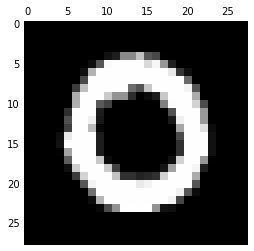

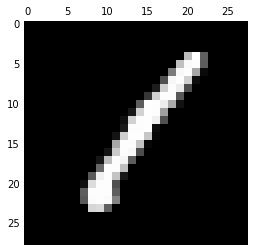

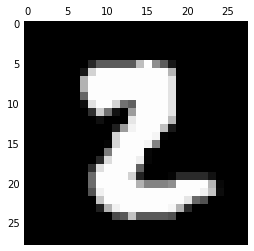

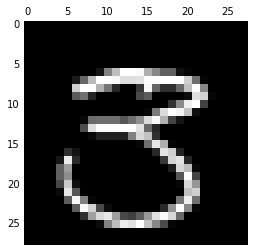

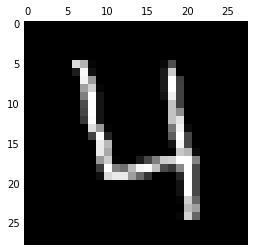

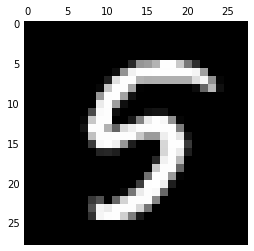

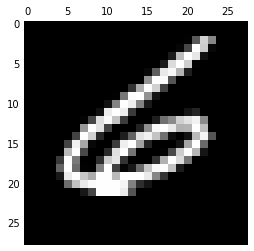

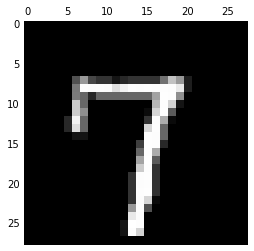

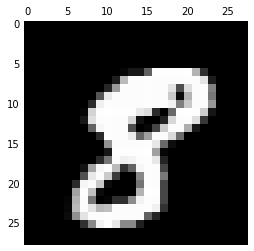

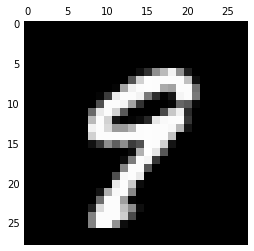

In [5]:
samples = np.empty([10,784])
for i in range(0,10):
    for j in range(0,len(Y_train)):
        if Y_train[j] == i:
            matshow(X_train[j].reshape(28,28), cmap='gray') 
            samples[i] = X_train[j]
            break

(array([ 0.10931217,  0.12391534,  0.11050265,  0.11510582,  0.10772487,
         0.10039683,  0.10944444,  0.11642857,  0.10748677,  0.11079365]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

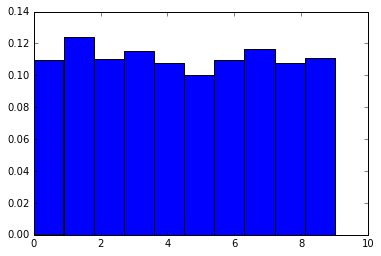

In [6]:
hist(Y_train, normed=True)

In [9]:
#"Sample Digits" are in sample_digits

# find distance with all digits 
dist_min = np.empty([2,10]) # nearest neighbour distance[0,:] and its index[1,:]

pairwise_distances = euclidean_distances(samples, X_train)
print pairwise_distances.shape

(10L, 42000L)


In [10]:
minval = numpy.ma.masked_equal(pairwise_distances, 0.0, copy=False)
dist_min[0,:] = minval.min(1) 

for i in range(0,10):
    dist_min[1,i] = nonzero(dist_min[0,i] == pairwise_distances)[1][0]
    
print dist_min

[[  1046.59543282    489.67948701   1380.8772574    1832.66499939
    1356.88098225   1066.36766643   1446.51132038    863.50101332
    1593.777588      910.57674031]
 [ 12950.          29704.           9536.           8981.          14787.
   30073.          16240.          15275.          32586.          35742.        ]]


Closest matches to the first ones follow it for comparison


C:\Users\Sprout\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Sprout\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Erroneous sample at 8981 5*


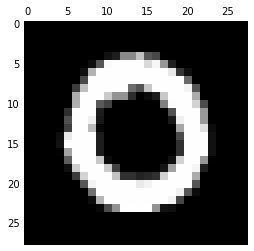

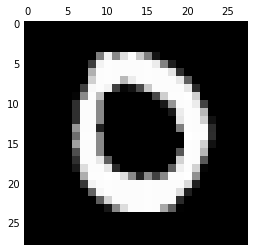

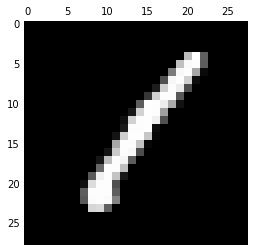

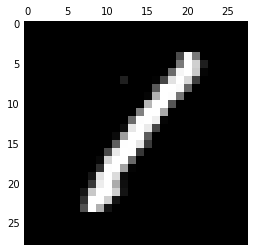

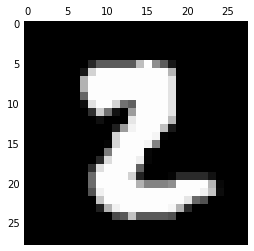

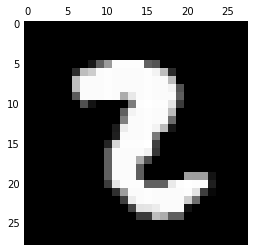

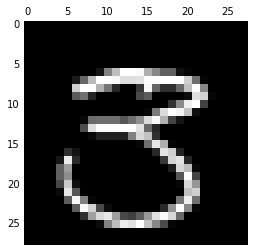

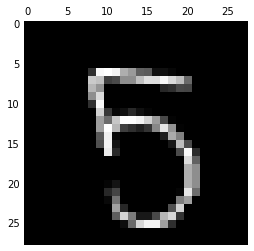

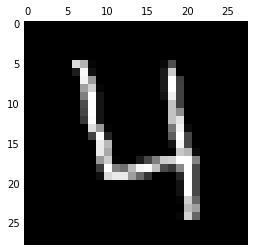

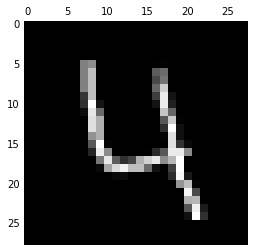

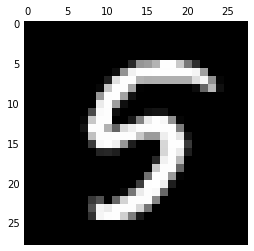

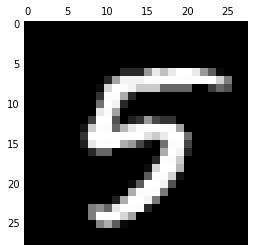

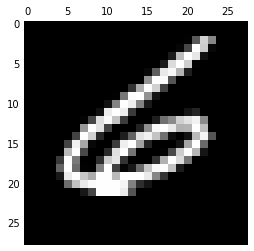

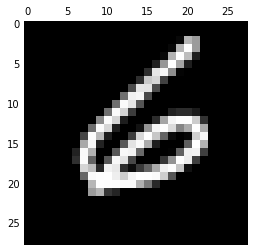

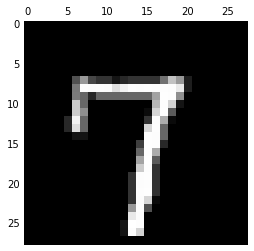

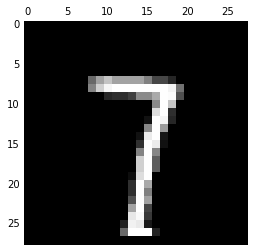

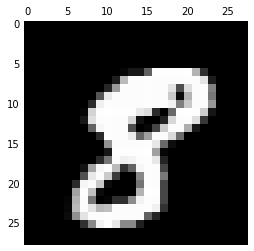

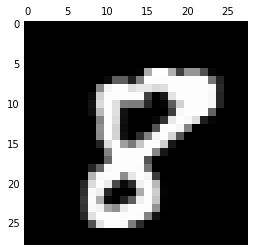

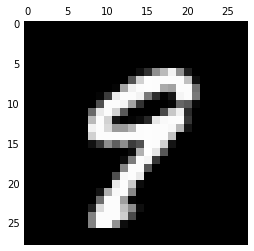

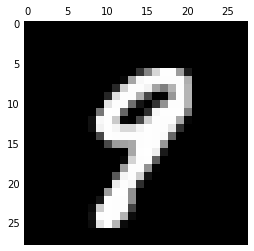

In [22]:
Y_withAsterix = X_train[:, 0]

print "Closest matches to the first ones follow it for comparison"

for i in range(0,10):
    matshow(samples[i].reshape(28,28), cmap='gray')
    matshow(X_train[int(dist_min[1,i])].reshape(28,28), cmap='gray') 
    # check labels of the closest neighbours
    if Y_train[dist_min[1,i]] != i:
        # erroneous samples
        print "Erroneous sample maybe at", int(dist_min[1,i]), str(Y_train[dist_min[1,i]]) + '*'
        #Y_withAsterix[dist_min[1,i]] = str(Y_train[dist_min[1,i]]) + '*'
        #print Y_withAsterix[dist_min[1,i]]

In [114]:
# why should the samples be marked with a * even though the labels are correct ?
# genuine and imposter matches for 0 and 1

In [47]:
zero_index = np.where(train[:,0] == 0)[0]
print zero_index.shape
one_index = np.where(train[:,0] == 1)[0]
print one_index.shape

(4132L,)
(4684L,)


In [48]:
zero_samples = X_train[zero_index]
one_samples = X_train[one_index]

In [49]:
print zero_samples.shape
print one_samples.shape

(4132L, 784L)
(4684L, 784L)


In [187]:
# pairwise - for genuine matches

zero_and_zero = euclidean_distances(zero_samples, zero_samples)
one_and_one = euclidean_distances(one_samples, one_samples)

# imposter matches
zero_and_one = euclidean_distances(zero_samples, one_samples)

([array([  1.00000000e+00,   1.40000000e+01,   2.37000000e+02,
           5.22000000e+02,   7.34000000e+02,   1.80400000e+03,
           1.28100000e+03,   8.70000000e+01,   4.00000000e+00,
           0.00000000e+00]),
  array([  1.00000000e+00,   8.60000000e+01,   7.55000000e+02,
           1.23700000e+03,   9.85000000e+02,   1.03000000e+03,
           5.41000000e+02,   4.80000000e+01,   1.00000000e+00,
           0.00000000e+00]),
  array([  1.00000000e+00,   2.90000000e+01,   7.82000000e+02,
           1.45900000e+03,   1.27000000e+03,   9.29000000e+02,
           2.01000000e+02,   1.30000000e+01,   0.00000000e+00,
           0.00000000e+00]),
  array([  1.00000000e+00,   5.90000000e+01,   4.41000000e+02,
           1.44000000e+03,   1.79600000e+03,   8.03000000e+02,
           1.32000000e+02,   1.20000000e+01,   0.00000000e+00,
           0.00000000e+00]),
  array([  1.00000000e+00,   4.00000000e+00,   1.73000000e+02,
           6.85000000e+02,   1.21900000e+03,   1.70600000e+03,
  

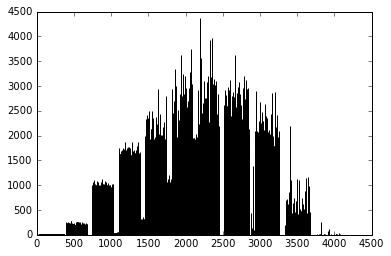

In [202]:
hist(zero_and_zero)
hist(one_and_one)

In [104]:
# kNN classifier

# x0 = query point
# k = find k nearest neighbours of x0
# X = dataset

# to get majority vote from k nearest neighbours 
# output = majority_vote

def kNN(X, x0, k):
    
    k_neighbour_votes = []
    
    distance_to_x0 = euclidean_distances(x0, X)
    
    # remove distance to self = 0.0
    distance_except_self = numpy.ma.masked_equal(distance_to_x0, 0.0, copy=False)
    
    # sort to get kNN
    distances_to_kNN = numpy.sort(distance_except_self)[0][:k]
    
    # get indices of kNN from Y_train
    for i in range(0,k):
        k_neighbour_votes.append(Y_train[nonzero(distances_to_kNN[i] == distance_except_self)[1][0]])
       
    # get majority vote
    counts = np.bincount(k_neighbour_votes)
    
    prediction_for_x0 = np.argmax(counts)
    #print "The label of the query point is", prediction_for_x0
    
    return prediction_for_x0

In [116]:
kNN(X_train, test[500],20005)

C:\Users\Sprout\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


6

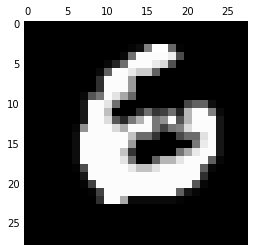

In [113]:
matshow(test[500].reshape(28,28), cmap='gray')

In [186]:
# 3 fold cross-validation on kNN using training data

def kNN_cv(X, x0, k):
    k = 3
    
    k_fold_split = np.array_split(X,k)
    
    for i in range(0,k):
        cv_train = k_fold_split[0:i]
        cv_train.append(k_fold_split[i+1:])
        cv_test = k_fold_split[i]
        
        print cv_test.shape
    
    return cv_train, cv_test

In [185]:
cv_train, cv_test = kNN_cv(X_train, test[500],20)

AttributeError: 'list' object has no attribute 'shape'

In [183]:
X_train.shape, cv_train[0].shape, cv_train[1].shape, cv_test.shape

((42000L, 784L), (14000L, 784L), (14000L, 784L), (14000L, 784L))